# Setup Variables

In [1]:
DATASET = 'FashionMNIST'
SEED = 42

# Libraries

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from fastprogress import progress_bar
from pathlib import Path

import torch
import torch.nn as nn
import torch.nn.functional as F
from torchinfo import summary

In [3]:
import os
os.chdir('..')
REPO_PATH = Path().cwd()
REPO_PATH

PosixPath('/home/ah19/runtime-monitoring')

In [4]:
from utilities.utils import *
from utilities.pathManager import fetchPaths
from utilities.plotFunctions import *

# GPU Device & Seed

In [5]:
np.random.seed(SEED)
torch.manual_seed(SEED)
torch.cuda.manual_seed(SEED)

# Paths

In [6]:
base = Path(REPO_PATH)
paths = fetchPaths(base, DATASET)

path = paths[DATASET.lower()]
path_dataset = paths['dataset']

# Load / Split / DataLoader

In [9]:
feature_names = get_labels(DATASET)

tf = T.Compose([
    T.ToTensor(),
    T.RandomAffine((10, 45)),
    T.RandomAffine(0, scale=(0.6, 1.1))
])

train_data = get_dataset(DATASET, path_dataset, train=True, transform=tf)
test_data = get_dataset(DATASET, path_dataset, train=False, transform=tf)
len(train_data), len(test_data)

Files already downloaded and verified
Files already downloaded and verified


(50000, 10000)

In [10]:
train_dataloader = get_dataLoader(train_data, 128, True)
test_dataloader = get_dataLoader(test_data, 128, False)

# Images

In [11]:
load_rc_settings_grid()

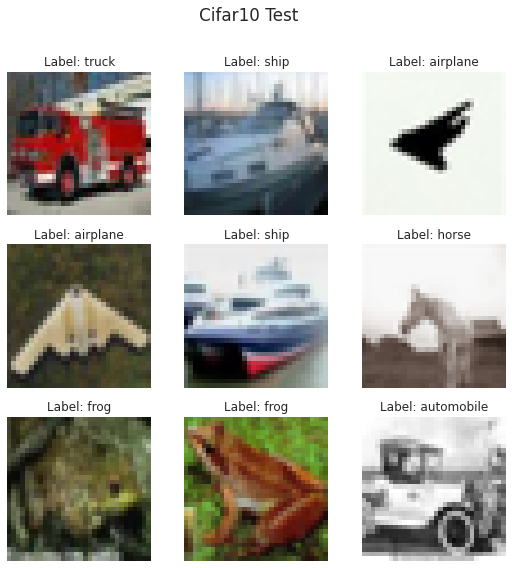

In [24]:
show_images_loader(test_dataloader, f"{DATASET} Test", feature_names)

# Class Distribution

In [14]:
load_rc_settings_general()

In [17]:
def count_classes(df, loader):
    pb = progress_bar(range(len(loader)))
    for _, (_, y) in zip(pb, loader):
        c = np.bincount(y, minlength=len(feature_names))
        df['count'] = df['count'] + c

In [18]:
train_df = pd.DataFrame({f"class": [i for i in feature_names.values()]
                         , "count": [0 for i in feature_names.values()]})
test_df = train_df.copy()

In [19]:
for d, l in zip((train_df, test_df) , (train_dataloader, test_dataloader)):
    count_classes(d, l)

In [20]:
train_df.set_index('class', inplace=True)
test_df.set_index('class', inplace=True)

<AxesSubplot:title={'center':'Cifar10 Train'}, xlabel='class'>

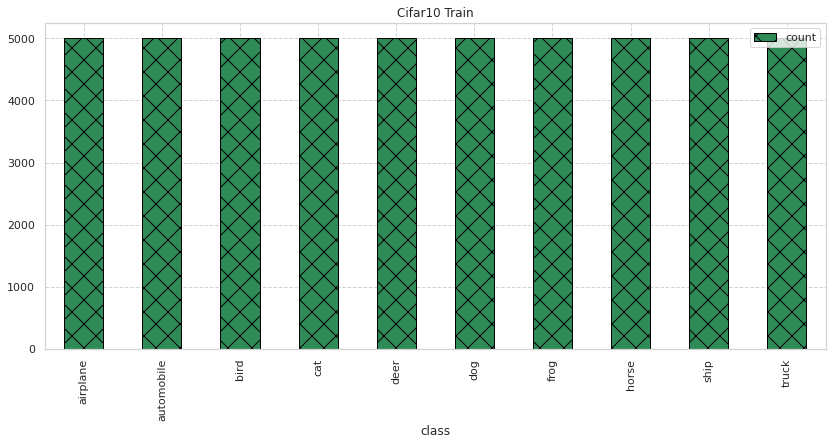

In [21]:
train_df.plot.bar(title=DATASET + ' Train', hatch='x', color='seagreen')

<AxesSubplot:title={'center':'Cifar10 Test'}, xlabel='class'>

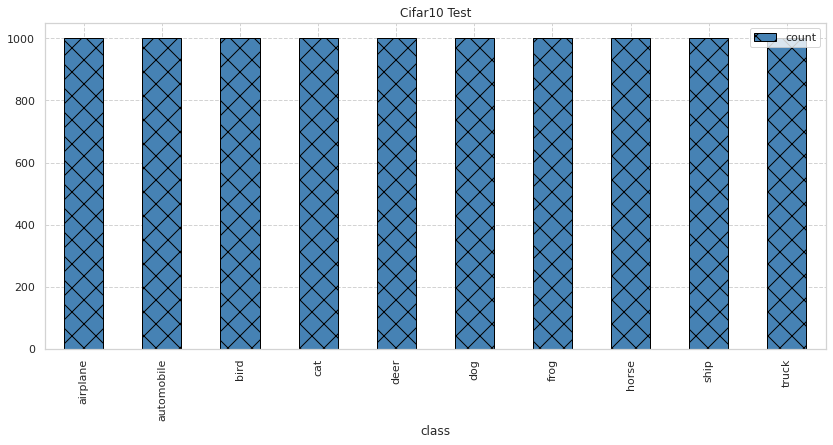

In [22]:
test_df.plot.bar(title=DATASET + ' Test', hatch='x', color='steelblue')